In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
conf_interval_z = 1.960

file_name = "3m_time_based/3macros_grasp_policy_{}_performance_data.csv"

# file_name = "2_macros_transport/policy_{}_performance_data.csv"

num_files = 10
x_axis = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
best_policy = 99

In [116]:
avg_total_rewards = []
total_reward_std = []

avg_reward_per_action = []
reward_per_action_std = []

num_conv = []

for i in x_axis:
    # open the csv file
    df = pd.read_csv(file_name.format(i))
    # get the data I want and will re-use
    temp_total_reward = df[' total_reward'].to_numpy()
    temp_total_std = df[' total_reward'].to_numpy()
    # save off avg and stddev
    avg_total_rewards.append(np.mean(temp_total_reward))
    total_reward_std.append(np.std(temp_total_std))
    # calculate the per-action reward for each trial

    num_action = df[' num_actions'].to_numpy()

    for i in range(len(num_action)):
        if (num_action[i] == 0):
            num_action[i] = 1

    per_action = np.divide(temp_total_reward, num_action)
    # save off mean and stddev
    avg_reward_per_action.append(np.mean(per_action))
    reward_per_action_std.append(np.std(per_action))

    num_conv.append(np.sum(df[' convergence_status'].to_numpy()))




In [117]:
print(avg_total_rewards)
print(total_reward_std)

[-137.62, -227.36, 6.46, -5.7, 2.84, 8.4, 7.34, 21.28, 51.74, 54.78, 56.22]
[33.1477842396743, 150.0684856990301, 103.2940869556433, 75.5567998263558, 74.98116030043815, 71.12974061530099, 71.54693843904154, 68.75377516907707, 18.54217894423414, 16.518825624117472, 14.845591938349918]


In [118]:
actions_best_policy = []

df = pd.read_csv(file_name.format(best_policy))
action_names = [' action_0_calls', ' action_1_calls', ' action_2_calls']
# action_names = [' action_0_calls', ' action_1_calls']

actions_best_policy = df[action_names].to_numpy()


actions_avg = np.round(np.mean(actions_best_policy, axis=0))
actions_total = np.sum(actions_best_policy, axis=0)

selected_actions_avg = []
selected_actions_total = []

for i in range(len(action_names)): ##################
    for j in range(int(actions_avg[i])):
        selected_actions_avg.append(i)
    
    for j in range(actions_total[i]):
        selected_actions_total.append(i)


print(actions_total)

[   0 1281  904]


In [119]:
print(avg_reward_per_action)
print(reward_per_action_std)

[-9.95879445939197, -2.5990652656417335, 0.3668793136279915, 0.673209460349322, 0.896680008992978, 1.4443429805044483, 1.1153121338838934, 1.7595360657411079, 2.5721812845343095, 2.805575252553238, 2.9716411656284603]
[4.266773529557324, 2.0555191506528785, 11.877320509432293, 2.303699020830661, 3.008270266688583, 2.710673666645883, 1.9318296734495317, 2.798035095039295, 1.2931242387884239, 1.1552305383129693, 1.3734361225979221]


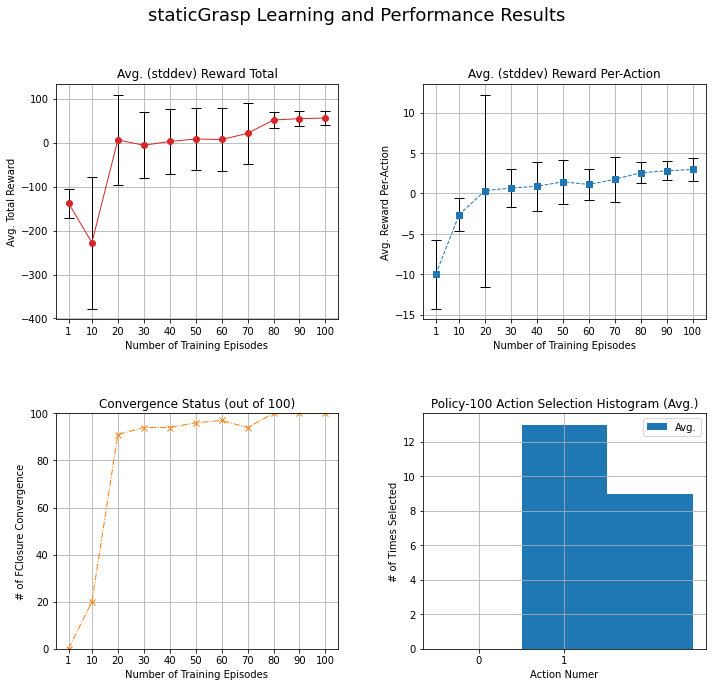

In [120]:
x_axis_adjusted = np.array(x_axis) + 1

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

color = 'tab:red'
axes[0][0].set_title("Avg. (stddev) Reward Total")
axes[0][0].set_xlabel('Number of Training Episodes')
axes[0][0].set_xticks(x_axis_adjusted)
axes[0][0].set_ylabel("Avg. Total Reward")
axes[0][0].errorbar(x_axis_adjusted, avg_total_rewards, yerr=total_reward_std, ecolor='k', color=color, capsize=5, marker='o', linewidth=1, linestyle='-')
axes[0][0].grid()

color = 'tab:blue'
axes[0][1].set_title("Avg. (stddev) Reward Per-Action")
axes[0][1].set_xlabel('Number of Training Episodes')
axes[0][1].set_xticks(x_axis_adjusted)
axes[0][1].set_ylabel("Avg. Reward Per-Action")
axes[0][1].errorbar(x_axis_adjusted, avg_reward_per_action, yerr=reward_per_action_std, ecolor='k', color=color, capsize=5, marker='s', linewidth=1, linestyle='--')
axes[0][1].grid()

color = 'tab:orange'
axes[1][0].set_title("Convergence Status (out of 100)")
axes[1][0].set_xlabel('Number of Training Episodes')
axes[1][0].set_xticks(x_axis_adjusted)
axes[1][0].set_ylim((0, 100))
axes[1][0].set_ylabel("# of FClosure Convergence")
axes[1][0].plot(x_axis_adjusted, num_conv, color=color, marker='x', linewidth=1, linestyle='-.')
axes[1][0].grid()


# axes[1][1].hist(selected_actions_total, np.array([0, 1, 2])-0.5, label="Total")
axes[1][1].hist(selected_actions_avg, np.array([0, 1, 2, 3])-0.5, label='Avg.')
axes[1][1].set_xticks([0, 1])
# axes[1][1].set_yticks(np.arange(0, max(actions_total)+1, 10.0))
axes[1][1].set_xlabel("Action Numer")
axes[1][1].set_ylabel("# of Times Selected")
axes[1][1].set_title("Policy-100 Action Selection Histogram (Avg.)")
axes[1][1].grid()
axes[1][1].legend()

fig.suptitle("staticGrasp Learning and Performance Results", size=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
fig.savefig("time_grasp_learning_curves.png")




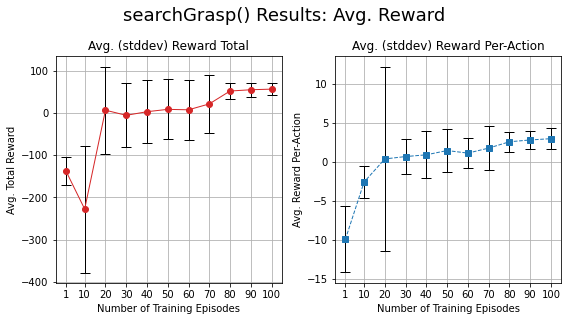

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))

color = 'tab:red'
axes[0].set_title("Avg. (stddev) Reward Total")
axes[0].set_xlabel('Number of Training Episodes')
axes[0].set_xticks(x_axis_adjusted)
axes[0].set_ylabel("Avg. Total Reward")
axes[0].errorbar(x_axis_adjusted, avg_total_rewards, yerr=total_reward_std, ecolor='k', color=color, capsize=5, marker='o', linewidth=1, linestyle='-')
axes[0].grid()

color = 'tab:blue'
axes[1].set_title("Avg. (stddev) Reward Per-Action")
axes[1].set_xlabel('Number of Training Episodes')
axes[1].set_xticks(x_axis_adjusted)
axes[1].set_ylabel("Avg. Reward Per-Action")
axes[1].errorbar(x_axis_adjusted, avg_reward_per_action, yerr=reward_per_action_std, ecolor='k', color=color, capsize=5, marker='s', linewidth=1, linestyle='--')
axes[1].grid()

fig.suptitle("searchGrasp() Results: Avg. Reward", size=18)

fig.tight_layout()

fig.savefig("time_grasp__learning_curves_just_reward.png")

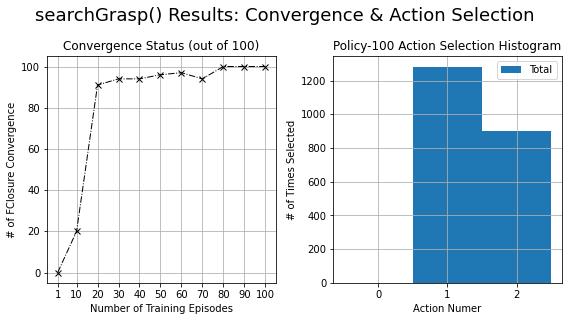

In [122]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4.5))

color = 'tab:orange'
axes[0].set_title("Convergence Status (out of 100)")
axes[0].set_xlabel('Number of Training Episodes')
axes[0].set_xticks(x_axis_adjusted)
axes[0].set_ylabel("# of FClosure Convergence")
axes[0].plot(x_axis_adjusted, num_conv, color='k', marker='x', linewidth=1, linestyle='-.')
axes[0].grid()


axes[1].hist(selected_actions_total, np.array([0, 1, 2, 3])-0.5, label="Total")
# axes[1].hist(selected_actions_avg, np.array([0, 1, 2, 3])-0.5, label='Avg.')
axes[1].set_xticks([0, 1, 2])
# axes[1].set_yticks(np.arange(0, max(actions_total)+1, 10.0))
axes[1].set_xlabel("Action Numer")
axes[1].set_ylabel("# of Times Selected")
axes[1].set_title("Policy-100 Action Selection Histogram")
axes[1].grid()
axes[1].legend()

fig.suptitle("searchGrasp() Results: Convergence & Action Selection", size=18)

fig.tight_layout()

fig.savefig("time_grasp_learning_curves_action_hist.png")